In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
!wget https://raw.githubusercontent.com/herval/haikuzao/master/inputs/haiku.txt

--2022-02-06 10:41:17--  https://raw.githubusercontent.com/herval/haikuzao/master/inputs/haiku.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261786 (256K) [text/plain]
Saving to: ‘haiku.txt’

haiku.txt           100%[===================>] 255.65K  --.-KB/s    in 0.03s   

2022-02-06 10:41:17 (8.00 MB/s) - ‘haiku.txt’ saved [261786/261786]



In [3]:
tokenizer = Tokenizer()

data = open('./haiku.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'a': 2, 'of': 3, 'in': 4, 'on': 5, 'my': 6, 'to': 7, 'moon': 8, 'rain': 9, 'and': 10, 'night': 11, 'day': 12, 'morning': 13, 'i': 14, 'her': 15, 'at': 16, 'from': 17, 'for': 18, 'winter': 19, 'his': 20, 'autumn': 21, 'spring': 22, 'with': 23, 'an': 24, 'summer': 25, 'snow': 26, 'first': 27, 'old': 28, 'sky': 29, 'cold': 30, 'new': 31, 'she': 32, 'wind': 33, 'leaves': 34, 'after': 35, 'blue': 36, 'light': 37, 'fog': 38, 'white': 39, 'by': 40, 'last': 41, 'out': 42, 'window': 43, 'one': 44, 'me': 45, 'full': 46, 'is': 47, 'another': 48, 'red': 49, 'through': 50, 'this': 51, 'clouds': 52, 'between': 53, 'all': 54, 'end': 55, 'no': 56, 'over': 57, 'sun': 58, 'up': 59, 'under': 60, 'evening': 61, 'still': 62, 'smell': 63, 'coffee': 64, 'two': 65, 'long': 66, 'scent': 67, 'our': 68, 'it': 69, 'into': 70, 'dawn': 71, 'empty': 72, 'late': 73, 'silence': 74, 'tea': 75, 'storm': 76, 'sunset': 77, 'more': 78, 'afternoon': 79, 'sound': 80, 'year': 81, 'garden': 82, 'time': 83, 'as': 84,

In [4]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]  # create data using each haiku line (n word wentences -> n-1 data elements)
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [5]:
print(tokenizer.word_index['moon'])

8


In [6]:
print(xs[3])
print(ys[3])

[   0    0    0    0    0    0    0    0    0    0    0 3311]
[0. 0. 0. ... 0. 0. 0.]


In [19]:
learningrate= 0.01
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
optm= tf.keras.optimizers.SGD(learning_rate=learningrate, momentum=0.99) # define custom optimizer with custom learning rate
model.compile(loss='categorical_crossentropy', optimizer=optm, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
print(model)
# build model with fully connected layers

In [20]:
history = model.fit(xs, ys, epochs=200, verbose=1)

Epoch 1/200
950/950 [==============================] - 12s 9ms/step - loss: 7.4412 - accuracy: 0.0796
Epoch 2/200
950/950 [==============================] - 8s 9ms/step - loss: 6.9195 - accuracy: 0.1013
Epoch 3/200
950/950 [==============================] - 8s 9ms/step - loss: 6.7388 - accuracy: 0.1054
Epoch 4/200
950/950 [==============================] - 8s 9ms/step - loss: 6.5458 - accuracy: 0.1150
Epoch 5/200
950/950 [==============================] - 8s 9ms/step - loss: 6.3656 - accuracy: 0.1208
Epoch 6/200
950/950 [==============================] - 8s 9ms/step - loss: 6.1853 - accuracy: 0.1285
Epoch 7/200
950/950 [==============================] - 8s 9ms/step - loss: 6.0006 - accuracy: 0.1352
Epoch 8/200
950/950 [==============================] - 8s 9ms/step - loss: 5.8248 - accuracy: 0.1392
Epoch 9/200
950/950 [==============================] - 8s 9ms/step - loss: 5.6389 - accuracy: 0.1466
Epoch 10/200
950/950 [==============================] - 8s 9ms/step - loss: 5.4657 - accur

In [9]:
import matplotlib.pyplot as plt


# create function to map accuracy and validation and other interesting metrics
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

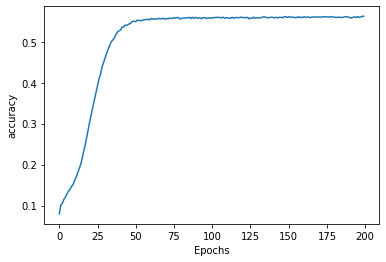

In [21]:
plot_graphs(history, 'accuracy')

In [24]:
seed_text = "the rain"
next_words = 16
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predict_x=model.predict(token_list) 
	predicted=np.argmax(predict_x,axis=1)
	#predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

the rain storm ends the temple of the pond between us on the white table back and me
